<a href="https://colab.research.google.com/github/indrack/2do-Parcial-INF-354/blob/main/ProyectoTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estos Datos pertenecen a UCI Machine Learning Repository, cuenta con 2 Datas Set, yo tome la de vinos blancos,  clasifiqué las calidades del vino en 3 categorías: buenas, media o estándar y malas.

 Luego, exploré los nuevos datos con bibliotecas de visualización de datos para tratar de entender que rera un buen o mal vino, ya que no soy un experto en el campo. 

Para la predicción utilicé los modelos K-Neighbors, Support Vector Machine y Random Forest. 

Para concluir, comparé las puntuaciones de precisión de acuerdo con las razones de predicción del modeloy unos Splits de pruebas como fue solicitado. 


In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

df = pd.read_csv("winequality-white_v2.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [39]:
#Informacion sobre los datos de las colummnas
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Preprocesado de los datos para para el MachineLearning e informacion mas clara


In [42]:
quality = df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Malos")
    elif num>6:
        category.append("Buenos")
    else:
        category.append("Regular o Estandar")

#Create new data
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([df,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)

data.head(10)                

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Regular o Estandar
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Regular o Estandar
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Regular o Estandar
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Regular o Estandar
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Regular o Estandar
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Regular o Estandar
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,Regular o Estandar
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Regular o Estandar
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Regular o Estandar
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,Regular o Estandar


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Regular o Estandar    3655
Buenos                1060
Malos                  183
Name: category, dtype: int64

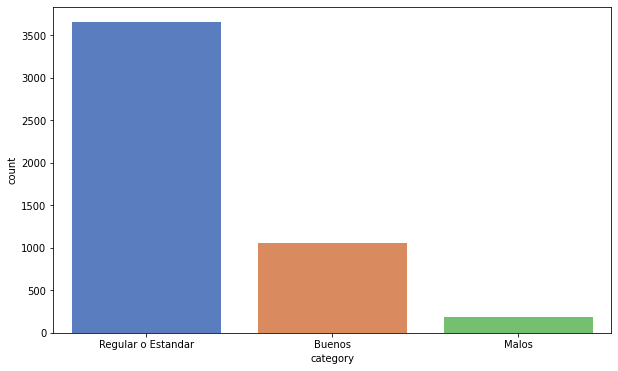

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"],palette="muted")
data["category"].value_counts()

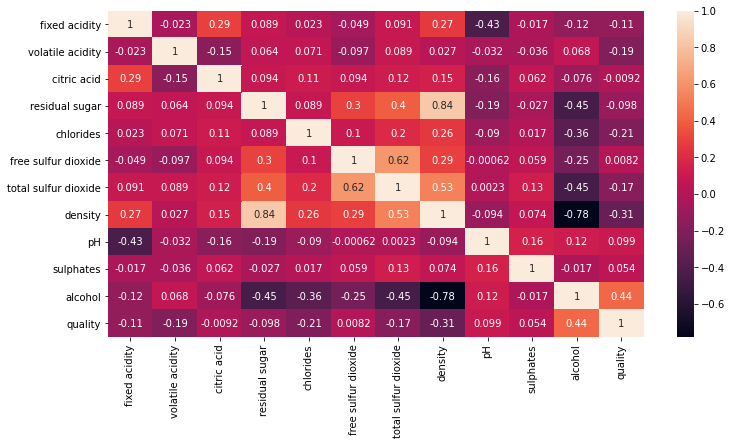

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

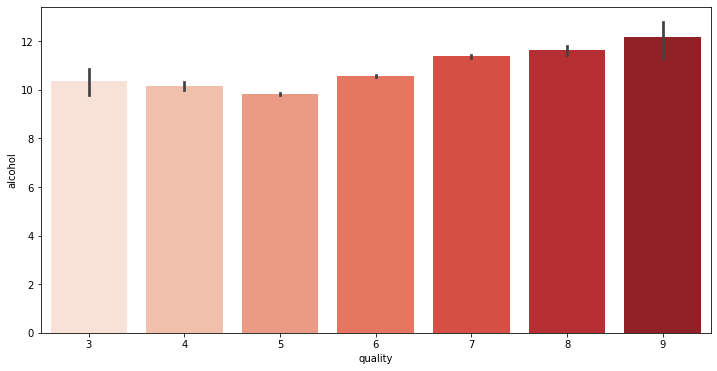

In [45]:
#El nivel del alcoholmientras mas alto hace que la calidad del vino aumente
plt.figure(figsize=(12,6))
sns.barplot(x=df["quality"],y=df["alcohol"],palette="Reds")

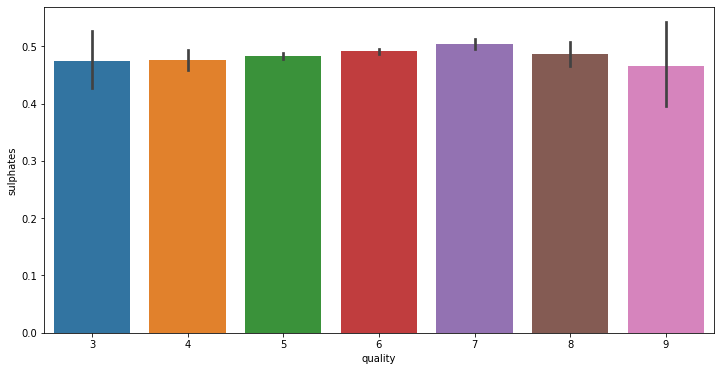

In [46]:
#Los Sulphates no tienes una relevancia marcable en la calidad
fig = plt.figure(figsize = (12,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

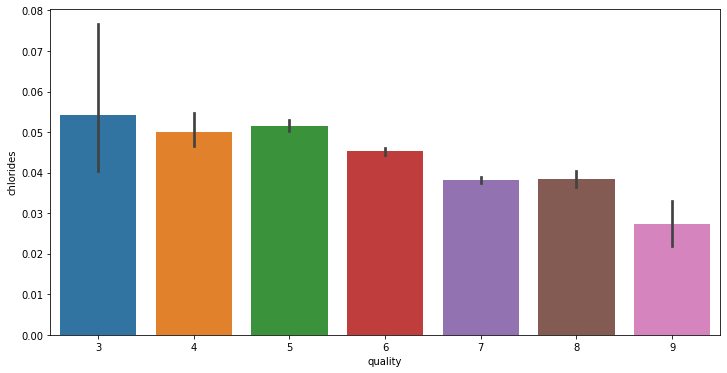

In [47]:
#Aqui vemos como los "cloruros" caen y la calidad se eleva
fig = plt.figure(figsize = (12,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

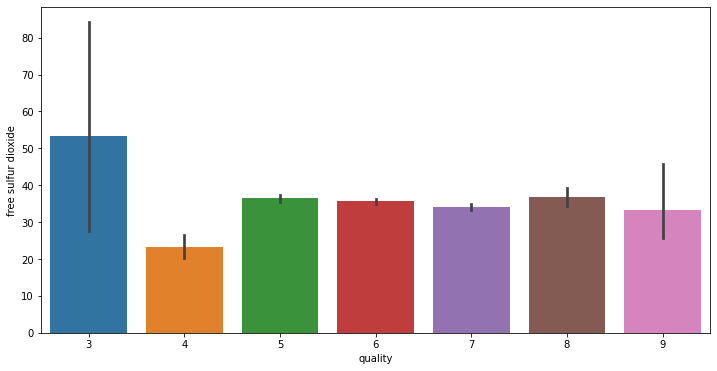

In [48]:
#Aqui solo podemos decir que para una buena calidad el nivel de "dióxido de azufre libre " debe estar 35 y 40 aproximadamente
fig = plt.figure(figsize = (12,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

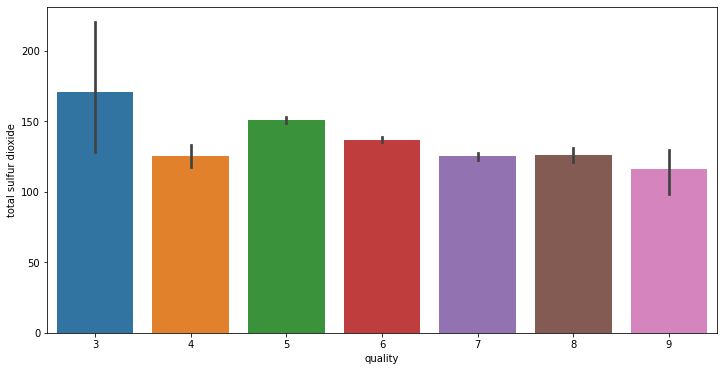

In [49]:
#Se puede apreciar como levemente a excepcion de calida#5 dismuye el "dióxido de azufre total" y aumenta la calidad hasta nivel 9 
fig = plt.figure(figsize = (12,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

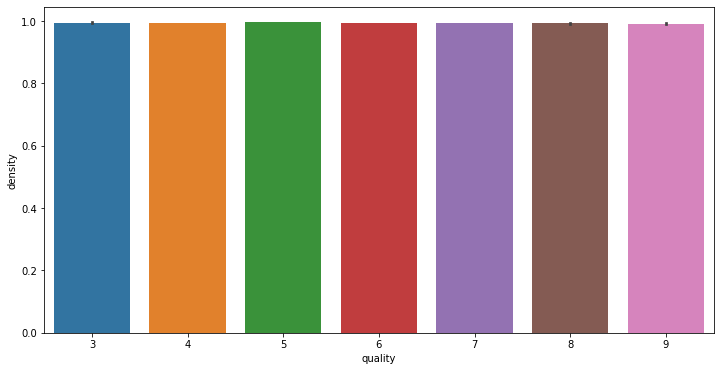

In [50]:
#Aca vemos como la densidad tiene un valor podria decirse estable en el nivel de calidad, lo cual podemos volver a ver en el pH
fig = plt.figure(figsize = (12,6))
sns.barplot(x = 'quality', y = 'density', data = df)

<Figure size 864x432 with 0 Axes>

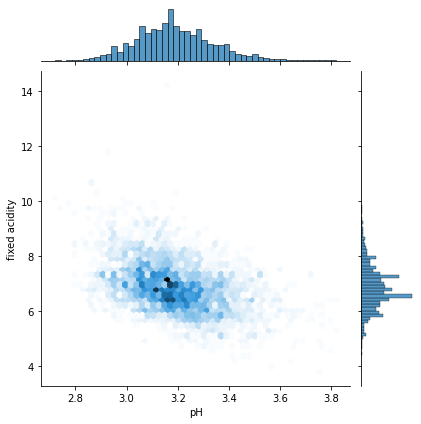

In [51]:
plt.figure(figsize=(12,6))
sns.jointplot(y=df["fixed acidity"],x=df["pH"],kind="hex")


<Figure size 864x432 with 0 Axes>

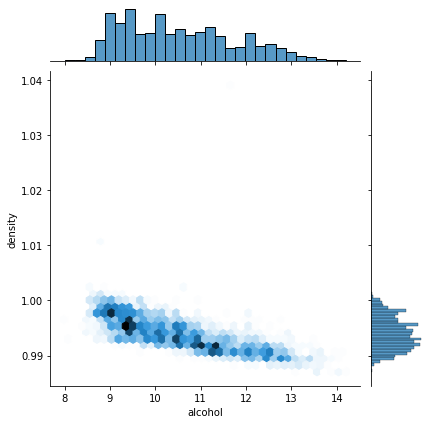

In [52]:
plt.figure(figsize=(12,6))
sns.jointplot(y=df["density"],x=df["alcohol"],kind="hex") 


Empezamos con los modelos de datos

In [53]:
X= data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [54]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [56]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Support Vector Machine (Maquinas de Vectores de Soporte)

In [78]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)
from sklearn.metrics import classification_report,accuracy_score

In [79]:

print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.32      0.44       216
           1       0.00      0.00      0.00        60
           2       0.77      0.96      0.85       704

    accuracy                           0.76       980
   macro avg       0.49      0.43      0.43       980
weighted avg       0.71      0.76      0.71       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
#Matriz de confusion para Random Support Vector Machine
print(confusion_matrix(y_test, pred_svc))

[[ 69   0 147]
 [  0   0  60]
 [ 28   0 676]]


K-Nearest Neighbors (K-Vecionos mas Proximos)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55       216
           1       0.50      0.05      0.09        60
           2       0.80      0.89      0.84       704

    accuracy                           0.76       980
   macro avg       0.63      0.49      0.49       980
weighted avg       0.73      0.76      0.73       980



In [66]:
#Matriz de confusion para Random K-Nearest Neighbors
print(confusion_matrix(y_test, pred_knn))

[[113   0 103]
 [  6   3  51]
 [ 76   3 625]]


Random Forest Classifier (Clasificador de Bosque Aleatorio)

In [63]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

#chequeo del procesado del modelo
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.79      0.57      0.66       216
           1       1.00      0.10      0.18        60
           2       0.82      0.95      0.88       704

    accuracy                           0.82       980
   macro avg       0.87      0.54      0.58       980
weighted avg       0.83      0.82      0.79       980



In [65]:
#Matriz de confusion para Random Forest Classifier
print(confusion_matrix(y_test, pred_rfc))

[[123   0  93]
 [  0   6  54]
 [ 32   0 672]]


Stochastic Gradient Decent Classifier (Clasificador de gradiente descendente estocástico)

In [70]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.56      0.02      0.04       216
           1       0.00      0.00      0.00        60
           2       0.72      1.00      0.84       704

    accuracy                           0.72       980
   macro avg       0.43      0.34      0.29       980
weighted avg       0.64      0.72      0.61       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
#Matriz de confusion para "Stochastic Gradient Decent Classifier" 
print(confusion_matrix(y_test, pred_sgd))

[[  5   0 211]
 [  1   0  59]
 [  3   0 701]]


Conlucion con los modelos y sus precisiones


In [72]:
conclusion = pd.DataFrame({'Modelos': ["SVC","KNN","RFC","SGD"],
                           'Precisiones': [accuracy_score(y_test,pred_svc),accuracy_score(y_test,pred_knn),accuracy_score(y_test,pred_rfc),accuracy_score(y_test,pred_sgd)]})
conclusion

,Modelos,Precisiones
0,SVC,0.760204
1,KNN,0.756122
2,RFC,0.817347
3,SGD,0.720408


----------------------------Mejoramiento de nuestras precisiones------------------------------------------------------



Grid Search CV

In [80]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.76      0.48      0.59       216
           1       1.00      0.07      0.12        60
           2       0.80      0.95      0.87       704

    accuracy                           0.80       980
   macro avg       0.85      0.50      0.53       980
weighted avg       0.80      0.80      0.76       980



Logramos subir nuestro SVC de 76% a 80%

Cross Validation Score for random forest and SGD

In [81]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.8524746855263844

Logramos subir nuestro RFC de 82% a 85%

In [82]:
#Now lets try to do some evaluation for random forest model using cross validation.
sgd_eval = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv = 10)
sgd_eval.mean()

0.7603437026984706

Logramos subir nuestro SGD de 72% a 76%